### Linear Models for the three sub categories

In [112]:
# Importing packages necessary for modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Reading the file created and saved in previous notebook
master_camera=pd.read_csv('Master_Camera.csv')
master_gaming=pd.read_csv('Master_Gaming.csv')
master_home=pd.read_csv('Master_Home.csv')

### Camera Accessory

In [114]:
master_camera.drop(['Unnamed: 0','Week','Prepaid_Flag_sum'], axis=1, inplace=True)
master_gaming.drop(['Unnamed: 0','Week','Prepaid_Flag_sum'], axis=1, inplace=True)
master_home.drop(['Unnamed: 0','Week','Prepaid_Flag_sum'], axis=1, inplace=True)

In [115]:
# Saving the continuous variables
conts = master_camera.drop(['Pay_Day_Flag', 'Sale_Flag', 'Rain_Flag', 'Snow_Flag'], axis=1).columns.tolist()
conts

['gmv_sum',
 'units_sum',
 'sla_mean',
 'product_mrp_mean',
 'product_mrp_sum',
 'product_procurement_sla_mean',
 'Weekly_Investment_Total_mean',
 'Weekly_Investment_TV_mean',
 'Weekly_Investment_Digital_mean',
 'Weekly_Investment_Sponsorship_mean',
 'Weekly_Investment_Content_Marketing_mean',
 'Weekly_Investment_Online_Marketing_mean',
 'Weekly_Investment_affiliates_mean',
 'Weekly_Investment_SEM_mean',
 'Weekly_Investment_Radio_mean',
 'Weekly_Investment_Other_mean',
 'NPS_mean',
 's1_fact.order_payment_type_sum',
 'Weekly_TV_adstock_mean',
 'Weekly_Digital_adstock_mean',
 'Weekly_Sponsorship_adstock_mean',
 'Weekly_Online_Marketing_adstock_mean',
 'Weekly_SEM_adstock_mean',
 'Weekly_affiliates_adstock_mean',
 'Max Temp (°C)_max',
 'Min Temp (°C)_min']

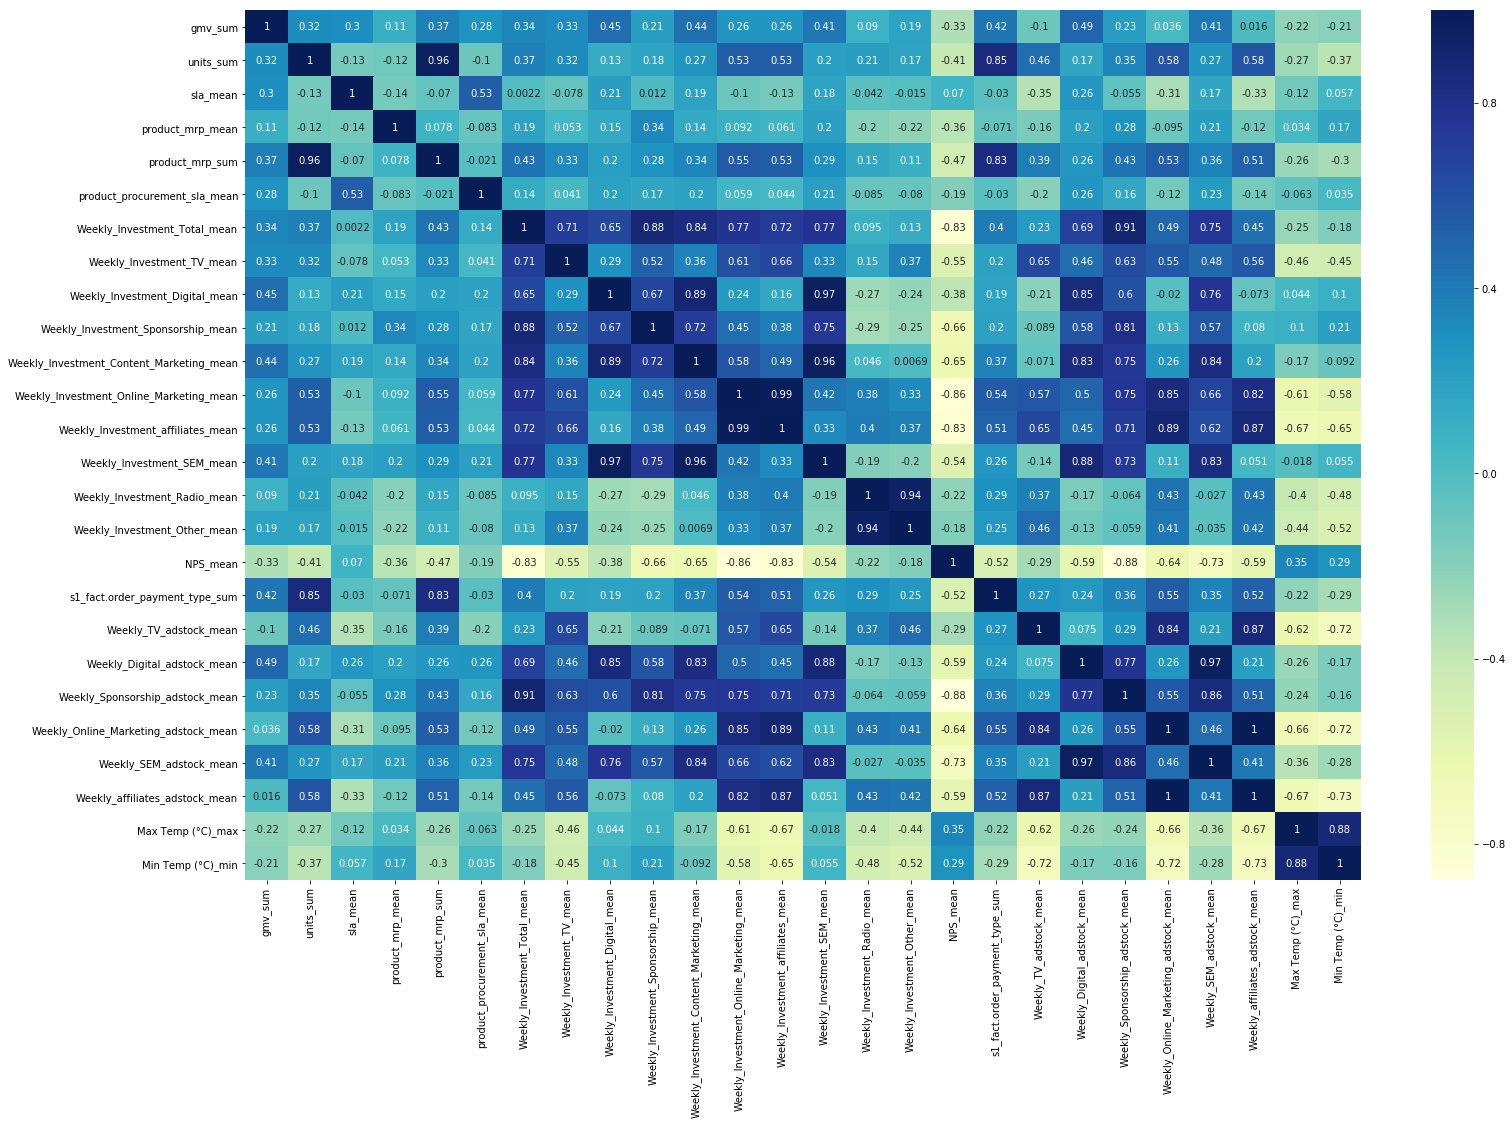

In [116]:
# Plotting the correlation matrix
plt.figure(figsize=(25, 16))
sns.heatmap(master_camera.drop(['Pay_Day_Flag', 'Sale_Flag', 'Rain_Flag', 'Snow_Flag'],axis=1).corr(),cmap='YlGnBu', annot = True)


In [117]:
# Rescaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

master_camera[conts]=scaler.fit_transform(master_camera[conts])
master_camera

,gmv_sum,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
0,0.061179,0.051091,0.369565,1.000000,0.056267,0.566343,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,1.243450e-14,0.015053,0.0,1,0,0.82500,0.777778
1,0.307156,0.299207,0.704151,0.836845,0.287805,0.552570,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,1.387779e-16,0.015053,0.0,1,0,0.85000,0.847222
2,0.341399,0.299403,0.474875,0.901107,0.305060,0.578000,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,0.000000e+00,0.015053,1.0,1,0,0.95000,0.875000
3,0.299095,0.283939,0.534979,0.802424,0.266559,0.574165,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,1.165734e-15,0.015053,0.0,1,0,0.96250,0.902778
4,0.128534,0.119898,0.561865,0.806425,0.112830,0.579783,0.000050,0.024114,1.701971e-01,0.075761,...,2.290714e-02,0.023464,0.012599,8.975535e-08,0.015028,0.0,1,0,0.96250,0.916667
5,0.000125,0.000196,1.000000,0.000000,0.000007,1.000000,0.029886,0.000000,6.666667e-02,0.000000,...,2.671756e-02,0.000000,0.000000,5.371857e-05,0.000000,0.0,1,0,0.83750,0.916667
6,0.000027,0.000000,0.435349,0.716926,0.000000,0.000000,0.029886,0.000000,6.666667e-02,0.000000,...,2.671756e-02,0.000000,0.000000,5.371857e-05,0.000000,1.0,0,0,0.91250,0.902778
7,0.049895,0.045708,0.517279,0.943831,0.048129,0.597676,0.552882,0.405502,7.389655e-02,0.720207,...,3.416821e-02,0.524097,0.368420,1.152475e-01,0.357463,1.0,0,0,0.92500,0.986111
8,0.332635,0.337085,0.539360,0.754700,0.304047,0.597387,0.565723,0.415459,7.407407e-02,0.737890,...,3.435115e-02,0.536965,0.377466,1.180759e-01,0.366240,0.0,1,0,0.93750,1.000000
9,0.349339,0.320055,0.504477,0.891152,0.324434,0.623017,0.565723,0.415459,7.407407e-02,0.737890,...,3.435115e-02,0.536965,0.377466,1.180759e-01,0.366240,0.0,1,0,0.76250,0.750000


In [138]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(master_camera, train_size = 0.7, test_size = 0.3, random_state = 100)

In [119]:
y_train = df_train.pop('gmv_sum')
X_train = df_train

In [120]:
import statsmodels.api as sm

# Add a constant

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [369]:
# Variance Inflation Factor
def VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)/5
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [122]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     57.80
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.85e-08
Time:                        04:15:19   Log-Likelihood:                 91.618
No. Observations:                  36   AIC:                            -133.2
Df Residuals:                      11   BIC:                            -93.65
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [123]:
VIF(X_train.drop(['Weekly_Investment_Total_mean','Weekly_Investment_Content_Marketing_mean',
                 'Weekly_Digital_adstock_mean','Weekly_Investment_Other_mean','NPS_mean',
                  'Weekly_affiliates_adstock_mean','Weekly_Investment_affiliates_mean','Weekly_Investment_SEM_mean','Weekly_Sponsorship_adstock_mean','units_sum',
                 'Weekly_Online_Marketing_adstock_mean','product_procurement_sla_mean',
                 'Min Temp (°C)_min','Weekly_Investment_Online_Marketing_mean','product_mrp_mean',
                 'product_mrp_sum','Weekly_Investment_TV_mean','Weekly_SEM_adstock_mean','sla_mean',
                 's1_fact.order_payment_type_sum','Max Temp (°C)_max'],axis=1))

,Features,VIF
1,Weekly_Investment_Sponsorship_mean,5.57
4,Weekly_TV_adstock_mean,4.10
6,Rain_Flag,3.45
0,Weekly_Investment_Digital_mean,3.12
2,Weekly_Investment_Radio_mean,1.74
3,Pay_Day_Flag,1.68
7,Snow_Flag,1.41
5,Sale_Flag,1.24


In [132]:
# Add a constant
# The variables have been chosen after various iterations
X_train_lm = sm.add_constant(X_train.drop(['Weekly_Investment_Total_mean','Weekly_Investment_Content_Marketing_mean',
                 'Weekly_Digital_adstock_mean','Weekly_Investment_Other_mean',
                  'Weekly_affiliates_adstock_mean','Weekly_Investment_affiliates_mean',
                 'Weekly_Investment_SEM_mean','Weekly_Sponsorship_adstock_mean','units_sum',
                 'Weekly_Online_Marketing_adstock_mean','Weekly_Investment_Sponsorship_mean',
                 'Min Temp (°C)_min','Weekly_Investment_Online_Marketing_mean','Weekly_Investment_TV_mean','Weekly_SEM_adstock_mean','sla_mean',
                 's1_fact.order_payment_type_sum','Max Temp (°C)_max','Rain_Flag','Pay_Day_Flag'],axis=1))

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     7.420
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.71e-05
Time:                        04:24:10   Log-Likelihood:                 27.306
No. Observations:                  36   AIC:                            -34.61
Df Residuals:                      26   BIC:                            -18.78
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [130]:
lr.params

const                            -1.102582
product_mrp_sum                   0.364898
product_procurement_sla_mean      1.861730
Weekly_Investment_Digital_mean    0.353484
Weekly_Investment_Radio_mean      0.376332
NPS_mean                          0.282584
Weekly_TV_adstock_mean           -0.116195
Sale_Flag                         0.023496
Snow_Flag                         0.184350
dtype: float64

Text(0.5,0,'Errors')

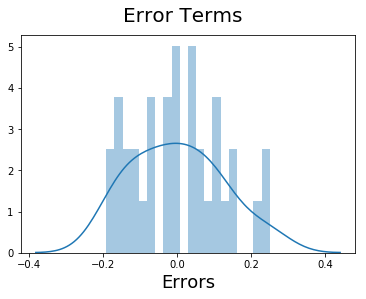

In [131]:
# Residual analysis
y_train_pred = lr.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [139]:
y_test = df_test.pop('gmv_sum')
X_test = df_test.drop(['Weekly_Investment_Total_mean','Weekly_Investment_Content_Marketing_mean',
                 'Weekly_Digital_adstock_mean','Weekly_Investment_Other_mean',
                  'Weekly_affiliates_adstock_mean','Weekly_Investment_affiliates_mean',
                 'Weekly_Investment_SEM_mean','Weekly_Sponsorship_adstock_mean','units_sum',
                 'Weekly_Online_Marketing_adstock_mean','Weekly_Investment_Sponsorship_mean',
                 'Min Temp (°C)_min','Weekly_Investment_Online_Marketing_mean','Weekly_Investment_TV_mean','Weekly_SEM_adstock_mean','sla_mean',
                 's1_fact.order_payment_type_sum','Max Temp (°C)_max','Rain_Flag','Pay_Day_Flag'],axis=1)


In [144]:
# Calculate RMSE
def rmse_r2score(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)
    return rmse, r2score
X_test_sm = sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)
rmse_r2score(y_test, y_pred)
print("RMSE: ", rmse)

RMSE:  0.5235319877339037


#### GMV = -1.10 + 1.86*product_procurement_sla_mean + 0.28*NPS_mean + 0.35*Weekly_Investment_Digital_mean - 0.11*Weekly_TV_adstock_mean + 0.023*Sales_Flag

### Gaming Accessory

In [145]:
# Saving the continuous variables
conts = master_gaming.drop(['Pay_Day_Flag', 'Sale_Flag', 'Rain_Flag', 'Snow_Flag'], axis=1).columns.tolist()
conts

['gmv_sum',
 'units_sum',
 'sla_mean',
 'product_mrp_mean',
 'product_mrp_sum',
 'product_procurement_sla_mean',
 'Weekly_Investment_Total_mean',
 'Weekly_Investment_TV_mean',
 'Weekly_Investment_Digital_mean',
 'Weekly_Investment_Sponsorship_mean',
 'Weekly_Investment_Content_Marketing_mean',
 'Weekly_Investment_Online_Marketing_mean',
 'Weekly_Investment_affiliates_mean',
 'Weekly_Investment_SEM_mean',
 'Weekly_Investment_Radio_mean',
 'Weekly_Investment_Other_mean',
 'NPS_mean',
 's1_fact.order_payment_type_sum',
 'Weekly_TV_adstock_mean',
 'Weekly_Digital_adstock_mean',
 'Weekly_Sponsorship_adstock_mean',
 'Weekly_Online_Marketing_adstock_mean',
 'Weekly_SEM_adstock_mean',
 'Weekly_affiliates_adstock_mean',
 'Max Temp (°C)_max',
 'Min Temp (°C)_min']

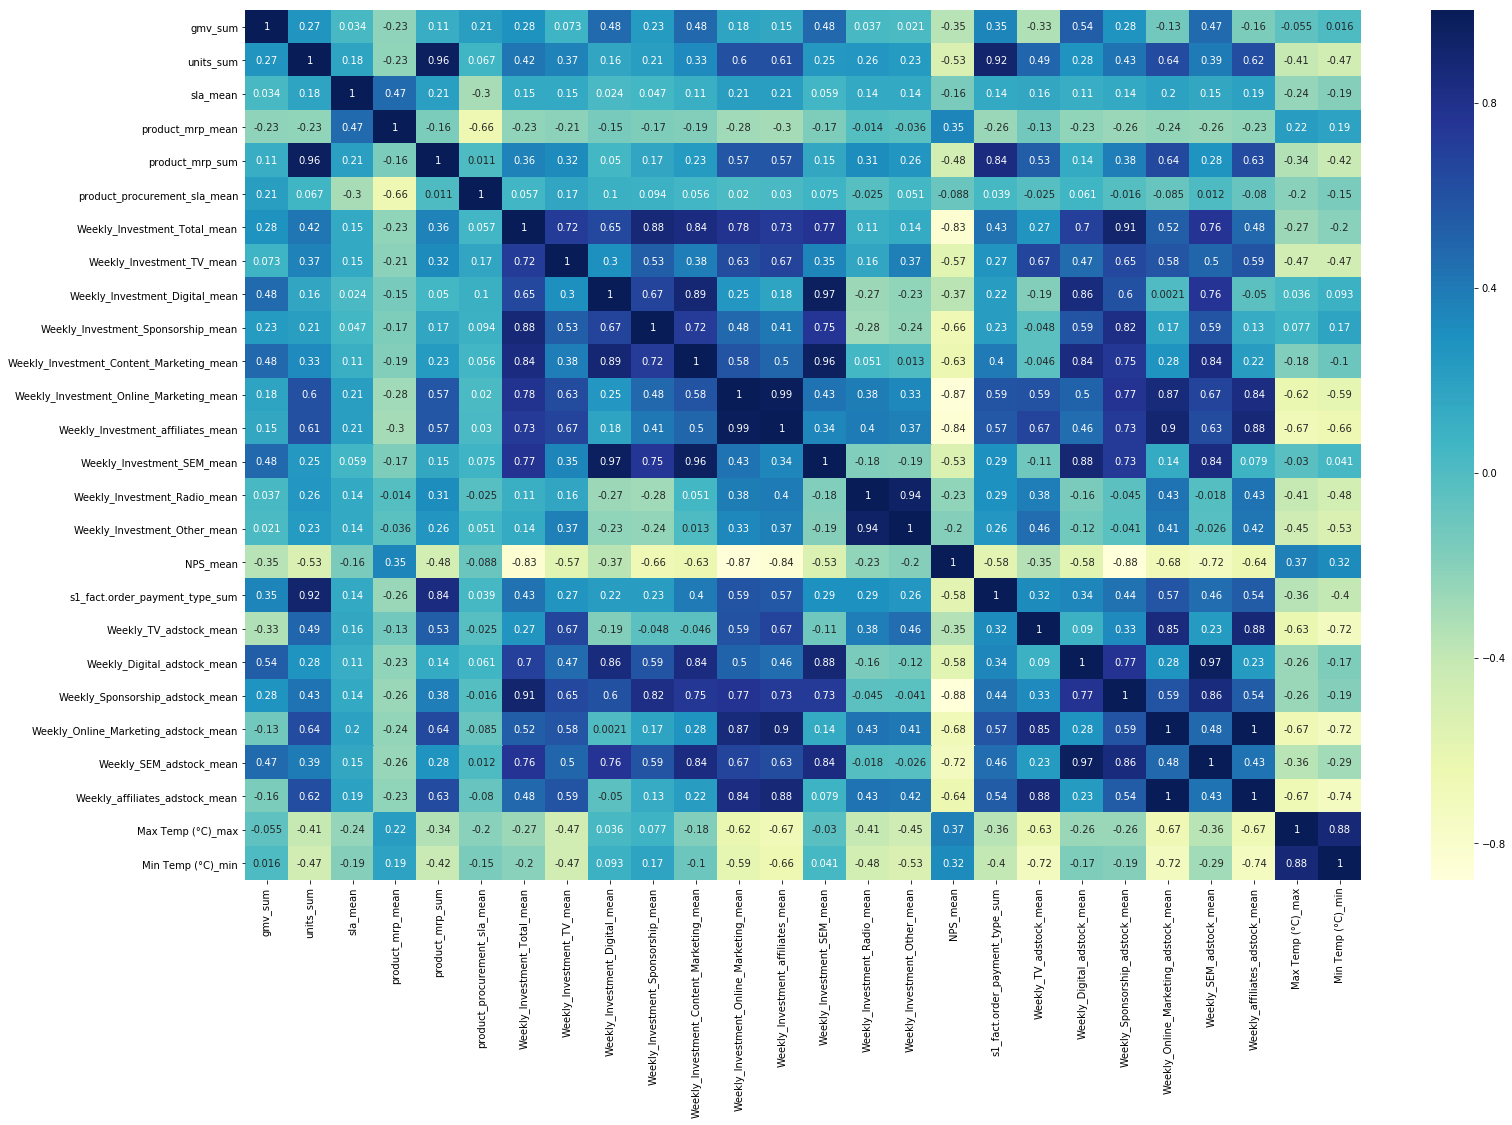

In [146]:
# Plotting the correlation matrix
plt.figure(figsize=(25, 16))
sns.heatmap(master_gaming.drop(['Pay_Day_Flag', 'Sale_Flag', 'Rain_Flag', 'Snow_Flag'],axis=1).corr(),cmap='YlGnBu', annot = True)


In [147]:
# Rescaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

master_gaming[conts]=scaler.fit_transform(master_gaming[conts])
master_gaming

,gmv_sum,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
0,0.114568,0.086235,0.239899,0.181447,0.103109,1.000000,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,1.010303e-14,0.015053,0.0,1,0,0.82500,0.777778
1,0.378320,0.255390,0.722907,0.185592,0.309737,0.734803,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,9.714451e-16,0.015053,0.0,1,0,0.85000,0.847222
2,0.347766,0.268559,0.502518,0.151971,0.291120,0.641337,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,0.000000e+00,0.015053,1.0,1,0,0.95000,0.875000
3,0.398108,0.236952,0.572820,0.269713,0.355027,0.541871,0.000000,0.024155,1.703704e-01,0.075888,...,2.290076e-02,0.023503,0.012620,3.053113e-15,0.015053,0.0,1,0,0.96250,0.902778
4,0.157165,0.096771,0.702659,0.261504,0.142593,0.573395,0.000062,0.024104,1.701552e-01,0.075731,...,2.290868e-02,0.023454,0.012594,1.114493e-07,0.015022,0.0,1,0,0.96250,0.916667
5,0.000833,0.000488,0.818182,0.154423,0.000495,0.730627,0.029886,0.000000,6.666667e-02,0.000000,...,2.671756e-02,0.000000,0.000000,5.371857e-05,0.000000,0.0,1,0,0.83750,0.916667
6,0.000146,0.000000,1.000000,1.000000,0.000247,0.000000,0.029886,0.000000,6.666667e-02,0.000000,...,2.671756e-02,0.000000,0.000000,5.371857e-05,0.000000,1.0,0,0,0.91250,0.902778
7,0.000132,0.000195,0.000000,0.000000,0.000000,0.531365,0.029886,0.000000,6.666667e-02,0.000000,...,2.671756e-02,0.000000,0.000000,5.371857e-05,0.000000,1.0,1,0,0.88750,0.888889
8,0.061378,0.042142,0.476782,0.184618,0.050151,0.578194,0.547734,0.401511,7.382538e-02,0.713117,...,3.409486e-02,0.518938,0.364793,1.141136e-01,0.353945,1.0,0,0,0.92500,0.986111
9,0.392740,0.302702,0.531357,0.139526,0.315441,0.666187,0.565723,0.415459,7.407407e-02,0.737890,...,3.435115e-02,0.536965,0.377466,1.180759e-01,0.366240,0.0,1,0,0.93750,1.000000


In [150]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_gaming, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('gmv_sum')
X_train = df_train

import statsmodels.api as sm

# Add a constant

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

In [153]:
# Adding column names to drop one by one with each iteration
VIF(X_train.drop(['Weekly_Investment_Total_mean','Weekly_Investment_Content_Marketing_mean',
                 'Weekly_Digital_adstock_mean','Weekly_Investment_Other_mean','NPS_mean',
                  'Weekly_affiliates_adstock_mean','Weekly_Investment_affiliates_mean','Weekly_Investment_SEM_mean','Weekly_Sponsorship_adstock_mean','units_sum',
                 'Weekly_Online_Marketing_adstock_mean','product_procurement_sla_mean',
                 'Min Temp (°C)_min','Weekly_Investment_Online_Marketing_mean','product_mrp_mean',
                 'product_mrp_sum','Weekly_Investment_TV_mean','Weekly_SEM_adstock_mean','sla_mean',
                 's1_fact.order_payment_type_sum','Max Temp (°C)_max'],axis=1))

,Features,VIF
1,Weekly_Investment_Sponsorship_mean,5.32
4,Weekly_TV_adstock_mean,3.84
6,Rain_Flag,3.48
0,Weekly_Investment_Digital_mean,3.19
3,Pay_Day_Flag,2.13
2,Weekly_Investment_Radio_mean,1.78
5,Sale_Flag,1.45
7,Snow_Flag,1.36


In [168]:
# Add a constant
# The variables have been chosen after various iterations
X_train_lm = sm.add_constant(X_train.drop(['Weekly_Investment_Total_mean','Weekly_Investment_Content_Marketing_mean',
                 'Weekly_Digital_adstock_mean','Weekly_Investment_Other_mean','Snow_Flag',
                  'Weekly_affiliates_adstock_mean','Weekly_Investment_affiliates_mean',
                 'Weekly_Investment_SEM_mean','Weekly_Sponsorship_adstock_mean','units_sum','Sale_Flag',
                 'Weekly_Online_Marketing_adstock_mean','Weekly_Investment_Sponsorship_mean','product_mrp_mean',
                 'Min Temp (°C)_min','Weekly_Investment_Online_Marketing_mean','Weekly_Investment_TV_mean','Weekly_SEM_adstock_mean','sla_mean',
                 's1_fact.order_payment_type_sum','Max Temp (°C)_max','Rain_Flag','Pay_Day_Flag','product_mrp_sum'],axis=1))

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     8.301
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.55e-05
Time:                        04:56:03   Log-Likelihood:                 19.748
No. Observations:                  37   AIC:                            -27.50
Df Residuals:                      31   BIC:                            -17.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [164]:
lr.params

const                            -0.122024
product_procurement_sla_mean      0.729318
Weekly_Investment_Digital_mean    0.306890
Weekly_Investment_Radio_mean      0.237962
NPS_mean                         -0.166520
Weekly_TV_adstock_mean           -0.305918
dtype: float64

Text(0.5,0,'Errors')

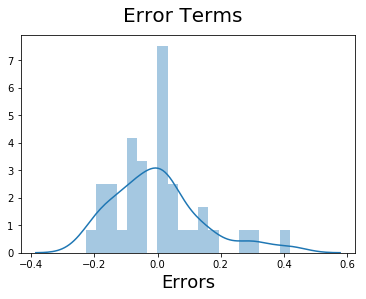

In [165]:
# Residual analysis
y_train_pred = lr.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
y_test = df_test.pop('gmv_sum')

In [171]:

X_test_sm = sm.add_constant(df_test.drop(['Weekly_Investment_Total_mean','Weekly_Investment_Content_Marketing_mean',
                 'Weekly_Digital_adstock_mean','Weekly_Investment_Other_mean','Snow_Flag',
                  'Weekly_affiliates_adstock_mean','Weekly_Investment_affiliates_mean',
                 'Weekly_Investment_SEM_mean','Weekly_Sponsorship_adstock_mean','units_sum','Sale_Flag',
                 'Weekly_Online_Marketing_adstock_mean','Weekly_Investment_Sponsorship_mean','product_mrp_mean',
                 'Min Temp (°C)_min','Weekly_Investment_Online_Marketing_mean','Weekly_Investment_TV_mean','Weekly_SEM_adstock_mean','sla_mean',
                 's1_fact.order_payment_type_sum','Max Temp (°C)_max','Rain_Flag','Pay_Day_Flag','product_mrp_sum'],axis=1))

print("RMSE: ", rmse)

RMSE:  0.5235319877339037


### gmv_sum= -0.12 + product_procurement_sla*0.72 + 0.23*Weekly_Investment_Radio_mean + -0.35*Weekly_TV_adstock_mean + -0.16*NPs_mean

### Home Audio

In [172]:
# Saving the continuous variables
conts = master_home.drop(['Pay_Day_Flag', 'Sale_Flag', 'Rain_Flag', 'Snow_Flag'], axis=1).columns.tolist()
conts

['gmv_sum',
 'units_sum',
 'sla_mean',
 'product_mrp_mean',
 'product_mrp_sum',
 'product_procurement_sla_mean',
 'Weekly_Investment_Total_mean',
 'Weekly_Investment_TV_mean',
 'Weekly_Investment_Digital_mean',
 'Weekly_Investment_Sponsorship_mean',
 'Weekly_Investment_Content_Marketing_mean',
 'Weekly_Investment_Online_Marketing_mean',
 'Weekly_Investment_affiliates_mean',
 'Weekly_Investment_SEM_mean',
 'Weekly_Investment_Radio_mean',
 'Weekly_Investment_Other_mean',
 'NPS_mean',
 's1_fact.order_payment_type_sum',
 'Weekly_TV_adstock_mean',
 'Weekly_Digital_adstock_mean',
 'Weekly_Sponsorship_adstock_mean',
 'Weekly_Online_Marketing_adstock_mean',
 'Weekly_SEM_adstock_mean',
 'Weekly_affiliates_adstock_mean',
 'Max Temp (°C)_max',
 'Min Temp (°C)_min']

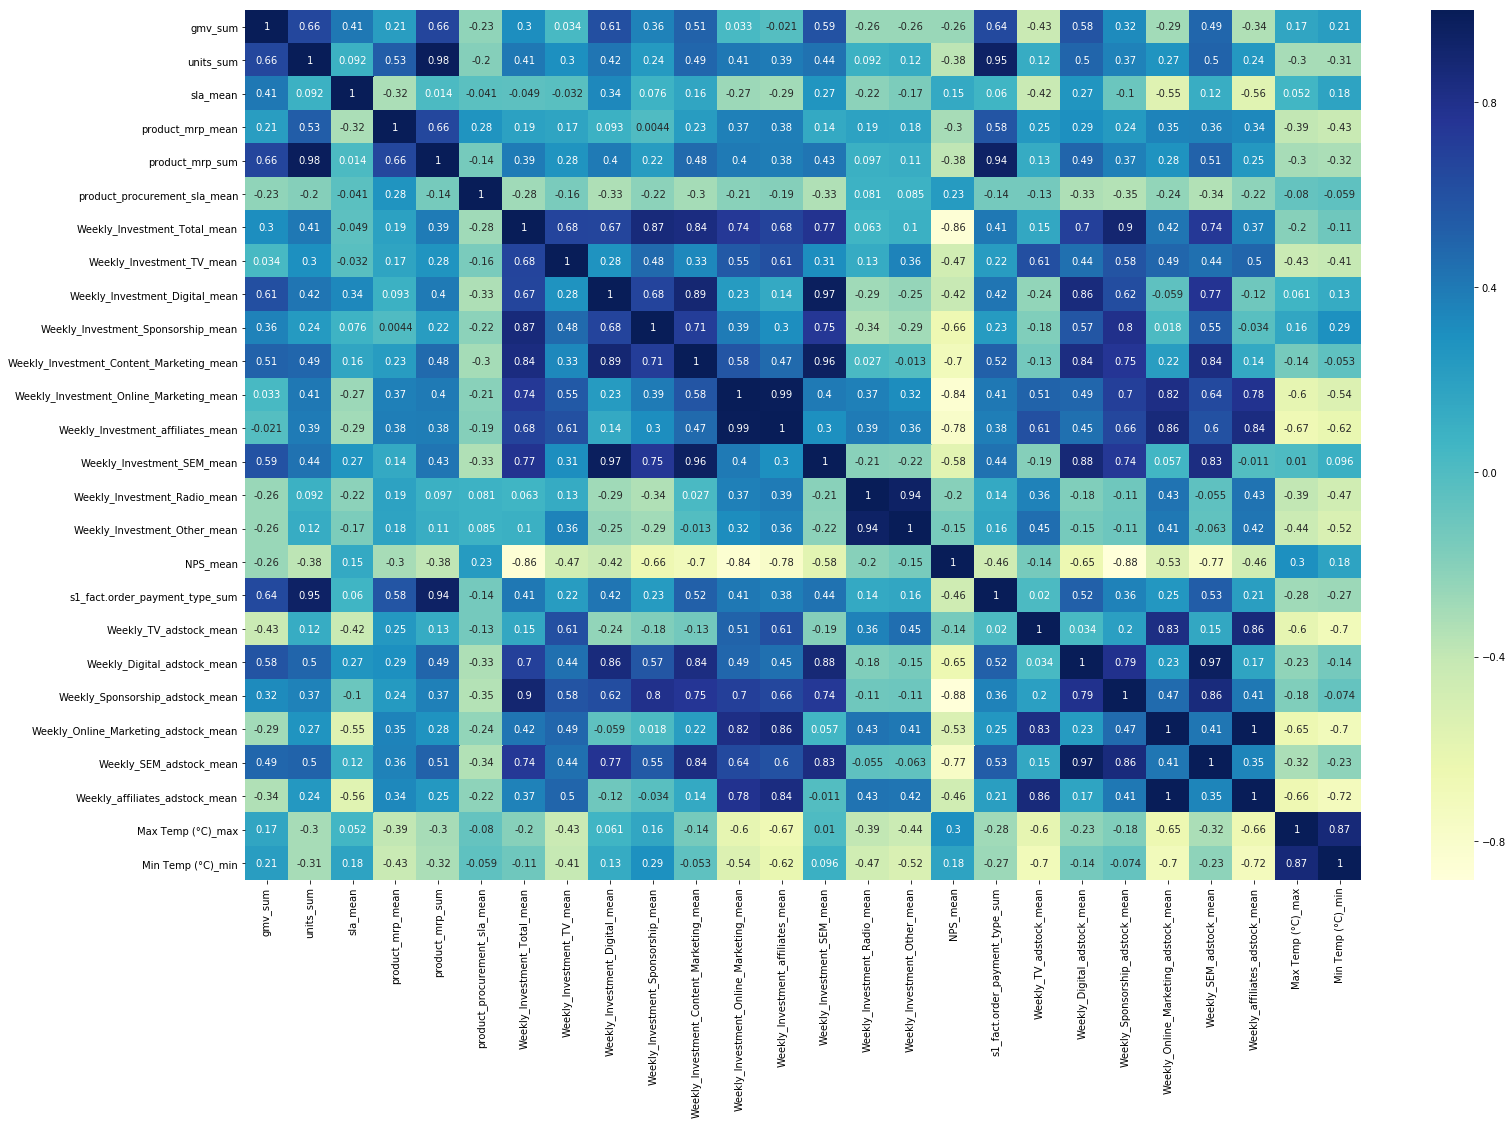

In [173]:
# Plotting the correlation matrix
plt.figure(figsize=(25, 16))
sns.heatmap(master_home.drop(['Pay_Day_Flag', 'Sale_Flag', 'Rain_Flag', 'Snow_Flag'],axis=1).corr(),cmap='YlGnBu', annot = True)


In [174]:
# Rescaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

master_home[conts]=scaler.fit_transform(master_home[conts])
master_home

,gmv_sum,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
0,0.046854,0.024597,0.775529,0.300697,0.019205,0.708860,0.000000,0.000026,1.703704e-01,4.024595e-02,...,2.290076e-02,0.000026,0.000014,6.245005e-15,0.000016,0.0,1,0,0.82500,0.777778
1,0.250471,0.268090,0.928745,0.128587,0.188538,0.692567,0.000000,0.000026,1.703704e-01,4.024595e-02,...,2.290076e-02,0.000026,0.000014,5.273559e-16,0.000016,0.0,1,0,0.85000,0.847222
2,0.262120,0.275377,0.909601,0.263699,0.206393,0.663649,0.000000,0.000026,1.703704e-01,4.024595e-02,...,2.290076e-02,0.000026,0.000014,0.000000e+00,0.000016,1.0,1,0,0.95000,0.875000
3,0.221027,0.246616,0.930938,0.123595,0.172391,0.705835,0.000000,0.000026,1.703704e-01,4.024595e-02,...,2.290076e-02,0.000026,0.000014,2.664535e-15,0.000016,0.0,1,0,0.96250,0.902778
4,0.104906,0.097085,1.000000,0.234421,0.071687,0.474601,0.000032,0.000000,1.702600e-01,4.016210e-02,...,2.290482e-02,0.000000,0.000000,5.714742e-08,0.000000,0.0,1,0,0.96250,0.916667
5,0.034637,0.017309,0.554725,0.419246,0.015417,0.692195,0.552812,0.390747,7.389558e-02,7.093146e-01,...,3.416720e-02,0.512583,0.360306,1.152320e-01,0.347605,1.0,0,0,0.92500,0.986111
6,0.228901,0.253904,0.512633,0.277190,0.191833,0.669218,0.565723,0.401006,7.407407e-02,7.277809e-01,...,3.435115e-02,0.525833,0.369517,1.180759e-01,0.356565,0.0,1,0,0.93750,1.000000
7,0.210140,0.237897,0.562020,0.216226,0.174570,0.826773,0.565723,0.401006,7.407407e-02,7.277809e-01,...,3.435115e-02,0.525833,0.369517,1.180759e-01,0.356565,0.0,1,0,0.76250,0.750000
8,0.199768,0.239979,0.793996,0.044143,0.160812,0.513457,0.565723,0.401006,7.407407e-02,7.277809e-01,...,3.435115e-02,0.525833,0.369517,1.180759e-01,0.356565,0.0,1,0,0.81250,0.861111
9,0.207736,0.245445,0.716918,0.042857,0.164776,0.383413,0.565723,0.401006,7.407407e-02,7.277809e-01,...,3.435115e-02,0.525833,0.369517,1.180759e-01,0.356565,0.0,1,0,0.78750,0.902778


In [195]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_home, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('gmv_sum')
X_train = df_train

import statsmodels.api as sm

# Add a constant

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     532.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.06e-13
Time:                        05:23:53   Log-Likelihood:                 131.45
No. Observations:                  35   AIC:                            -214.9
Df Residuals:                      11   BIC:                            -177.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [196]:
# Adding column names to drop one by one with each iteration
VIF(X_train)

,Features,VIF
20,Weekly_Sponsorship_adstock_mean,250384.10
13,Weekly_Investment_Radio_mean,184343.92
12,Weekly_Investment_SEM_mean,130969.26
19,Weekly_Digital_adstock_mean,113181.14
22,Weekly_SEM_adstock_mean,85473.65
9,Weekly_Investment_Content_Marketing_mean,70029.09
18,Weekly_TV_adstock_mean,60572.99
10,Weekly_Investment_Online_Marketing_mean,49615.91
21,Weekly_Online_Marketing_adstock_mean,37583.22
14,Weekly_Investment_Other_mean,29478.28


In [197]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1
X = X_train.drop('Weekly_Investment_Online_Marketing_mean', 1,)
X = X.drop('Weekly_Investment_Total_mean', 1,) 
X = X.drop('Pay_Day_Flag', 1,) 
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('Rain_Flag', 1,)
X = X.drop('product_mrp_mean', 1,)
X = X.drop('Weekly_Investment_Other_mean', 1,)
X = X.drop('Weekly_Investment_affiliates_mean', 1,)
X = X.drop('Weekly_Investment_SEM_mean', 1,)
X = X.drop('Snow_Flag', 1,)
X = X.drop('product_mrp_sum', 1,)
X = X.drop('Max Temp (°C)_max', 1,)
X = X.drop('product_procurement_sla_mean', 1,)
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,)
X = X.drop('sla_mean', 1,)
X = X.drop('Weekly_Investment_Radio_mean', 1,)
X = X.drop('Weekly_Investment_TV_mean', 1,)



In [198]:
#Iteration 21
X=X.drop(['units_sum'], 1,)


In [199]:
# Iteration 22
X=X.drop('Weekly_Digital_adstock_mean', 1,)

In [210]:
X=X.drop('Weekly_affiliates_adstock_mean', 1,)

In [211]:
X=X.drop('Weekly_Online_Marketing_adstock_mean', 1,)

In [220]:
X=X.drop('Weekly_Sponsorship_adstock_mean', 1,)

In [224]:
X=X.drop('s1_fact.order_payment_type_sum', 1,)

In [225]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [226]:
lr_2.params

const                             0.017181
Weekly_Investment_Digital_mean    0.192525
NPS_mean                          0.081636
Weekly_TV_adstock_mean           -0.240252
Weekly_SEM_adstock_mean           0.297695
Sale_Flag                         0.097589
Min Temp (°C)_min                 0.058106
dtype: float64

In [227]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     7.410
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.13e-05
Time:                        05:35:23   Log-Likelihood:                 25.322
No. Observations:                  35   AIC:                            -36.64
Df Residuals:                      28   BIC:                            -25.76
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Text(0.5,0,'Errors')

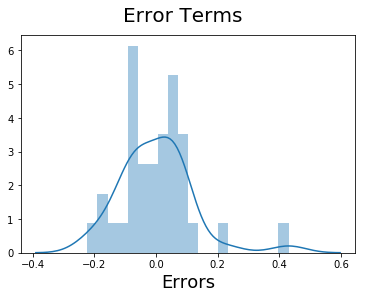

In [228]:
# Residual analysis
y_train_pred = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [229]:
X_test = df_test[X.columns]
X_test_sm = sm.add_constant(X_test)
y_test = df_test['gmv_sum']

In [230]:
y_pred = lr_2.predict(X_test_sm)

In [231]:
#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [232]:
print("RMSE: ", rmse, "\nR-Squared Score: ", r2score)

RMSE:  0.11186296932966337 
R-Squared Score:  -0.9310708335597668


##### GMV_SUM = -0.017 + 0.192*Weekly_Investment_Digital_mean + 0.8*NPS_mean + 0.05*Min Temp (°C)_min +  -0.178507 *Weekly_TV_adstock_mean 

### Multiplicative Models

#### Camera Accessory

In [271]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_camera, train_size = 0.7, test_size = 0.3, random_state = 100)

In [283]:
X_train_log = (np.log(df_train)).replace(-np.inf, 0).iloc[:,0:]

X_train_log.head(100)

,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,Weekly_Investment_Content_Marketing_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
40,-0.902874,-1.077405,-0.468998,-1.113015e+00,-0.760119,-1.096499e+00,-5.791286e-01,-3.401197e+00,-1.281149e+00,-4.343805e+00,...,-2.860294e+00,-8.186906e-01,-1.817890e-01,-1.839867e+00,-1.204760e-01,0.0,0.0,0.0,-0.287682,-0.810930
44,-0.591336,-1.129398,-0.372263,-7.425873e-01,-0.777705,-7.789811e-01,-1.931521e+00,-3.652512e+00,-1.005163e+00,-1.453434e+00,...,-3.228536e+01,-7.320358e-01,-3.454810e-02,-1.513620e+00,-5.961753e-02,0.0,0.0,0.0,-0.271153,-0.563094
37,-0.746106,-1.183907,-0.749092,-1.118723e+00,-0.761274,-5.311309e-01,-4.662937e-15,-1.987504e+00,-7.248612e-01,-2.264364e+00,...,-1.854772e+00,-7.088025e-01,-9.841832e-02,-1.568316e+00,-5.989688e-02,0.0,0.0,0.0,-0.450201,-0.909370
17,-0.702094,-0.819069,-0.255023,-7.788697e-01,-0.481006,-1.200716e+00,-7.894240e-01,-2.708050e+00,-1.853933e+00,-2.957511e+00,...,-6.931472e-01,-5.028856e-01,-1.862486e-01,-5.332483e-01,-1.850815e-01,0.0,0.0,0.0,-0.356675,-0.780159
7,-3.085479,-0.659173,-0.057808,-3.033867e+00,-0.514706,-5.926108e-01,-9.026285e-01,-2.605089e+00,-3.282172e-01,-1.729005e+00,...,-3.376460e+00,-6.460789e-01,-9.985329e-01,-2.160673e+00,-1.028722e+00,0.0,0.0,0.0,-0.077962,-0.013986
49,-0.877605,-1.085895,-0.380143,-1.041100e+00,-0.698764,-1.379179e+00,-1.721801e+00,-2.507380e+00,-1.248734e+00,-4.343805e+00,...,-3.622434e+00,-8.165887e-01,-4.126289e-01,-1.902469e+00,-4.058895e-01,0.0,0.0,0.0,-0.012579,-0.149532
47,-0.619851,-0.967639,-0.620538,-9.231663e-01,-0.826986,-1.379179e+00,-1.721801e+00,-2.507380e+00,-1.248734e+00,-4.343805e+00,...,-3.622434e+00,-8.165887e-01,-4.126289e-01,-1.902469e+00,-4.058895e-01,0.0,0.0,0.0,-0.133531,-0.117783
28,-0.716016,-0.553293,-0.197759,-7.531271e-01,-0.602977,-8.298195e-01,-7.580078e-01,-3.388537e+01,-3.293149e+00,-1.348073e+00,...,-1.879465e+00,-8.945871e-01,-1.110223e-16,-1.080766e+00,-1.487699e-14,0.0,0.0,0.0,-1.290984,-1.386294
19,-1.197501,-0.853497,-0.145846,-1.209565e+00,-0.523269,-1.200716e+00,-7.894240e-01,-2.708050e+00,-1.853933e+00,-2.957511e+00,...,-6.931472e-01,-5.028856e-01,-1.862486e-01,-5.332483e-01,-1.850815e-01,0.0,0.0,0.0,-0.644357,-0.944462
21,-1.018698,-0.776014,-0.012659,-9.349800e-01,-0.530785,-4.662550e-01,-5.452271e-01,-1.537979e+00,-4.076203e-01,-1.165752e+00,...,-8.678641e-01,-2.417061e-01,-6.494682e-02,-5.609501e-01,-8.727838e-02,0.0,0.0,0.0,-1.163151,-0.944462


In [273]:
y_train_log=df_train.pop('gmv_sum')

In [274]:
y_train_log

40    0.000000
44    0.000000
37    0.249263
17    0.486138
7     0.049895
49    0.008009
47    0.006242
28    0.453702
19    0.321382
21    0.000000
13    0.326371
1     0.307156
4     0.128534
12    0.330337
27    0.253891
42    0.000000
22    0.000000
29    0.295541
9     0.349339
16    0.364707
36    0.282455
46    0.000000
50    0.006799
41    0.000000
14    1.000000
43    0.000000
2     0.341399
34    0.433639
30    0.339354
10    0.328232
15    0.349003
23    0.000000
39    0.000000
3     0.299095
24    0.000000
8     0.332635
Name: gmv_sum, dtype: float64

In [284]:
# Build first fitted model

X = X_train_log
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()



In [285]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     43.54
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.99e-07
Time:                        06:45:21   Log-Likelihood:                 88.991
No. Observations:                  36   AIC:                            -126.0
Df Residuals:                      10   BIC:                            -84.81
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [286]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,Weekly_affiliates_adstock_mean,1266901.39
21,Weekly_Online_Marketing_adstock_mean,1187560.99
10,Weekly_Investment_Online_Marketing_mean,165817.25
11,Weekly_Investment_affiliates_mean,165427.04
3,product_mrp_sum,125200.25
0,units_sum,113277.78
12,Weekly_Investment_SEM_mean,14090.82
2,product_mrp_mean,3495.82
9,Weekly_Investment_Content_Marketing_mean,3196.22
8,Weekly_Investment_Sponsorship_mean,2305.56


In [287]:
# Dropping highly correlated variables and insignificant variables

#Iteration wise removal of columns .Each column is removed after regular inspection of VIF and p-values
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,)
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,)
X = X.drop('product_mrp_sum', 1,)


In [288]:
X = X.drop('units_sum', 1,) 
X = X.drop('sla_mean', 1,)
X = X.drop('Weekly_Investment_affiliates_mean', 1,)

X = X.drop('Weekly_Investment_Total_mean', 1,)
X = X.drop('Weekly_Investment_SEM_mean', 1,)
X = X.drop('Weekly_Investment_Radio_mean', 1,)
X = X.drop('Rain_Flag', 1,)
X = X.drop('Snow_Flag', 1,) 
X = X.drop('Sale_Flag', 1,)
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('Pay_Day_Flag', 1,)
X = X.drop('Max Temp (°C)_max', 1,)
X = X.drop('Weekly_Investment_Other_mean', 1,)

In [289]:
# second iteration for fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()


In [290]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     4.087
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00184
Time:                        06:45:38   Log-Likelihood:                 26.514
No. Observations:                  36   AIC:                            -25.03
Df Residuals:                      22   BIC:                            -2.859
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [262]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Weekly_Online_Marketing_adstock_mean,15024.59
11,Weekly_affiliates_adstock_mean,13973.45
8,Weekly_Sponsorship_adstock_mean,197.88
2,Weekly_Investment_TV_mean,46.73
1,product_procurement_sla_mean,23.86
6,Weekly_TV_adstock_mean,12.49
12,Min Temp (°C)_min,9.25
0,product_mrp_mean,9.03
5,s1_fact.order_payment_type_sum,4.46
10,Weekly_SEM_adstock_mean,3.23


In [263]:
X = X.drop(['Weekly_Online_Marketing_adstock_mean','Weekly_affiliates_adstock_mean'], 1,)

In [268]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Weekly_Sponsorship_adstock_mean,5.83
0,product_mrp_mean,3.51
8,Min Temp (°C)_min,3.12
7,Weekly_SEM_adstock_mean,3.08
4,Weekly_TV_adstock_mean,2.83
3,s1_fact.order_payment_type_sum,2.38
1,Weekly_Investment_Digital_mean,1.55
5,Weekly_Digital_adstock_mean,1.43
2,NPS_mean,1.38


In [291]:
# Residual Analysis
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

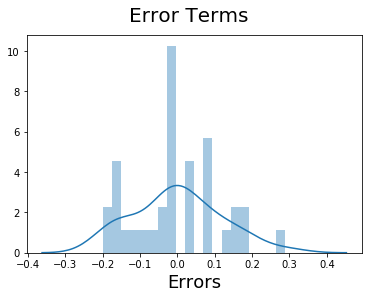

In [292]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_log - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### GMV =  0.2911 - 0.0492 * product_mrp_mean + 0.1610 * product_procurement_sla_mean - 0.0103 * Weekly_Investment_TV_mean + 0.0044 * Weekly_Investment_Digital_mean - 0.0136 * Monthly_NPS_mean  + 0.0274 * Min Temp (°C)_min

#### Gaming Accessory

In [316]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_gaming, train_size = 0.7, test_size = 0.3, random_state = 100)

In [317]:
X_train_log = (np.log(df_train)).replace(-np.inf, 0).iloc[:,1:]

X_train_log.head(100)

,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,Weekly_Investment_Content_Marketing_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
26,-0.927178,-0.314225,-1.568384,-6.654118e-01,-0.567995,-7.294377e-01,-7.024739e-01,-2.961627e+00,-1.669171e+00,-1.301030e+00,...,-1.527781e+00,-6.942421e-01,-1.526012e-02,-9.287482e-01,-2.033375e-02,0.0,0.0,0.0,-0.779250,-1.280934
41,-1.314321,-0.399568,-1.450584,-9.827183e-01,-0.566497,-1.096499e+00,-5.791286e-01,-3.401197e+00,-1.281149e+00,-4.343805e+00,...,-2.860294e+00,-8.186906e-01,-1.817890e-01,-1.839867e+00,-1.204760e-01,0.0,0.0,0.0,-0.287682,-0.810930
28,-0.995273,-0.373818,-1.827764,-8.750926e-01,-0.589334,-8.298195e-01,-7.580078e-01,0.000000e+00,-3.293149e+00,-1.348073e+00,...,-1.879465e+00,-8.945871e-01,-7.971401e-14,-1.080766e+00,-1.110223e-16,0.0,0.0,0.0,-1.437588,-1.568616
38,-1.103600,-0.385764,-1.460478,-7.825374e-01,-0.502362,-5.311309e-01,-2.220446e-16,-1.987504e+00,-7.248612e-01,-2.264364e+00,...,-1.854772e+00,-7.088025e-01,-9.841832e-02,-1.568316e+00,-5.989688e-02,0.0,0.0,0.0,-0.450201,-0.909370
17,-1.077474,-0.417320,-2.059868,-1.077146e+00,-0.824356,-3.396798e-01,-5.512141e-01,-4.853852e-01,-4.269112e-01,-4.952871e-01,...,-2.306763e-01,-1.777307e-01,-2.409411e-01,-1.866720e-01,-2.862278e-01,0.0,0.0,0.0,-0.393043,-0.384846
7,-8.541983,0.000000,0.000000,0.000000e+00,-0.632306,-3.510356e+00,0.000000e+00,-2.708050e+00,0.000000e+00,0.000000e+00,...,-3.622434e+00,0.000000e+00,0.000000e+00,-9.831752e+00,0.000000e+00,0.0,0.0,0.0,-0.119347,-0.117783
50,-1.046441,-0.400196,-1.494460,-7.506717e-01,-0.758440,-1.379179e+00,-1.721801e+00,-2.507380e+00,-1.248734e+00,-4.343805e+00,...,-3.622434e+00,-8.165887e-01,-4.126289e-01,-1.902469e+00,-4.058895e-01,0.0,0.0,0.0,-0.012579,-0.149532
49,-0.974896,-0.453878,-1.538246,-7.005529e-01,-0.753361,-1.379179e+00,-1.721801e+00,-2.507380e+00,-1.248734e+00,-4.343805e+00,...,-3.622434e+00,-8.165887e-01,-4.126289e-01,-1.902469e+00,-4.058895e-01,0.0,0.0,0.0,0.000000,-0.306374
40,-1.123202,-0.314223,-1.467384,-8.021565e-01,-0.481368,-1.096499e+00,-5.791286e-01,-3.401197e+00,-1.281149e+00,-4.343805e+00,...,-2.860294e+00,-8.186906e-01,-1.817890e-01,-1.839867e+00,-1.204760e-01,0.0,0.0,0.0,-0.885519,-0.810930
19,-1.167982,-0.308203,-2.099443,-1.177105e+00,-0.695950,-1.200716e+00,-7.894240e-01,-2.708050e+00,-1.853933e+00,-2.957511e+00,...,-6.931472e-01,-5.028856e-01,-1.862486e-01,-5.332483e-01,-1.850815e-01,0.0,0.0,0.0,-0.597837,-0.448025


In [318]:
y_train_log=df_train.pop('gmv_sum')

In [323]:
# Build first fitted model

X = X_train_log
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.70e-05
Time:                        07:03:59   Log-Likelihood:                 69.063
No. Observations:                  37   AIC:                            -86.13
Df Residuals:                      11   BIC:                            -44.24
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [321]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 26 to 8
Data columns (total 29 columns):
units_sum                                   37 non-null float64
sla_mean                                    37 non-null float64
product_mrp_mean                            37 non-null float64
product_mrp_sum                             37 non-null float64
product_procurement_sla_mean                37 non-null float64
Weekly_Investment_Total_mean                37 non-null float64
Weekly_Investment_TV_mean                   37 non-null float64
Weekly_Investment_Digital_mean              37 non-null float64
Weekly_Investment_Sponsorship_mean          37 non-null float64
Weekly_Investment_Content_Marketing_mean    37 non-null float64
Weekly_Investment_Online_Marketing_mean     37 non-null float64
Weekly_Investment_affiliates_mean           37 non-null float64
Weekly_Investment_SEM_mean                  37 non-null float64
Weekly_Investment_Radio_mean                37 non-null float64
W

In [324]:
# Droppig variables as per vif and p-values adjustment
# Dropping highly correlated variables and insignificant variables
X = X.drop('product_mrp_sum', 1,)
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('Weekly_Investment_TV_mean', 1,) 
X = X.drop('Weekly_Investment_SEM_mean', 1,)
X = X.drop('units_sum', 1,) 

X = X.drop('product_procurement_sla_mean', 1,)
X = X.drop('Pay_Day_Flag', 1,)
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) 
X = X.drop('Rain_Flag', 1,)
X = X.drop('Snow_Flag', 1,)
X = X.drop('Sale_Flag', 1,)
X = X.drop('Weekly_Investment_Total_mean', 1,)
X = X.drop('sla_mean', 1,)
X = X.drop('Weekly_Investment_Radio_mean', 1,)
X = X.drop('Max Temp (°C)_max', 1,)
X = X.drop('Weekly_Investment_Digital_mean', 1,)



In [325]:
# second iteration for fitted model

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()

In [326]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     3.319
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00585
Time:                        07:04:49   Log-Likelihood:                 23.571
No. Observations:                  37   AIC:                            -19.14
Df Residuals:                      23   BIC:                             3.410
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Text(0.5,0,'Errors')

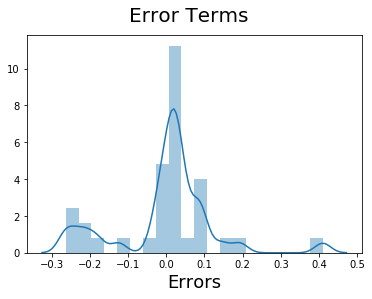

In [327]:
y_train_pred = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_log - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                         

#### Multiplicative equation for GamingAccesory category
#### GMV_SUM = 0.0932 - 0.2469 * product_mrp_mean + 0.0361 * Weekly_Investment_Content_Marketing_mean - 0.0246 * Weekly_Investment_affiliates_mean + 0.0250 * Weekly_Investment_Other_mean - 0.0083 * Monthly_NPS_mean - 0.0422 * COD_Payment_Percentage + 0.0903 * Min Temp (°C)_min

#### Home Audio

In [329]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_home, train_size = 0.7, test_size = 0.3, random_state = 100)

In [330]:
X_train_log = (np.log(df_train)).replace(-np.inf, 0).iloc[:,1:]

X_train_log.head(100)

,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,Weekly_Investment_Content_Marketing_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
25,-1.421795,-0.538864,-0.969508,-1.653059,-5.313350e-01,-8.298195e-01,-7.864476e-01,0.000000e+00,-3.351294e+01,-1.348073e+00,...,-1.879465e+00,-9.299791e-01,0.000000e+00,-1.080766e+00,-1.110223e-16,0.0,0.0,0.0,-1.437588,-1.568616
26,-1.115278,-0.508180,-0.580761,-1.274790,-7.066926e-01,-8.298195e-01,-7.864476e-01,-3.559737e+01,-3.445314e+01,-1.348073e+00,...,-1.879465e+00,-9.299791e-01,-3.685940e-14,-1.080766e+00,-2.364775e-14,0.0,0.0,0.0,-1.290984,-1.386294
35,-1.528115,-0.555639,0.000000,-1.953687,-9.724469e-01,-5.311309e-01,2.220446e-16,-1.987504e+00,-7.667823e-01,-2.264364e+00,...,-1.854772e+00,-7.339163e-01,-9.973968e-02,-1.568316e+00,-6.083969e-02,0.0,0.0,0.0,-0.450201,-0.909370
17,-1.534132,-0.387611,-1.110910,-1.790678,-7.748914e-01,-1.200716e+00,-8.195979e-01,-2.708050e+00,-2.086735e+00,-2.957511e+00,...,-6.931472e-01,-5.187216e-01,-1.888658e-01,-5.332483e-01,-1.881903e-01,0.0,0.0,0.0,-0.644357,-0.944462
7,-1.435918,-0.576217,-1.531430,-1.745431,-1.902254e-01,-5.696501e-01,-9.137792e-01,-2.602690e+00,-3.177553e-01,-1.704748e+00,...,-3.371120e+00,-6.427720e-01,-9.955579e-01,-2.136427e+00,-1.031238e+00,0.0,0.0,0.0,-0.271153,-0.287682
47,-1.756219,-1.081950,-1.779721,-2.095452,-5.188771e-01,-1.379179e+00,-1.842392e+00,-2.507380e+00,-1.349528e+00,-4.343805e+00,...,-3.622434e+00,-8.474190e-01,-4.191718e-01,-1.902469e+00,-4.135619e-01,0.0,0.0,0.0,-0.012579,-0.149532
31,-1.210152,-0.478499,-1.272761,-1.486722,-8.135430e-01,-1.116290e+00,-1.002667e+00,-2.084205e+00,-1.906940e+00,-1.837220e+00,...,-1.919189e+00,-1.199963e+00,-4.937388e-02,-1.427987e+00,-3.201123e-02,0.0,0.0,0.0,-0.948039,-1.018570
32,-1.067226,-0.706463,-0.747604,-1.260803,-7.270571e-01,-5.311309e-01,-5.073719e-14,-1.987504e+00,-7.667823e-01,-2.264364e+00,...,-1.854772e+00,-7.339163e-01,-9.973968e-02,-1.568316e+00,-6.083969e-02,0.0,0.0,0.0,-0.553385,-0.944462
19,-1.122450,-1.000111,-0.042688,-1.122778,-4.440892e-16,-4.662550e-01,-5.633156e-01,-1.537979e+00,-4.272205e-01,-1.165752e+00,...,-8.678641e-01,-2.483015e-01,-6.580393e-02,-5.609501e-01,-8.867167e-02,0.0,0.0,0.0,-1.163151,-0.944462
21,-1.123650,-0.542960,-0.386996,-1.228962,-7.335129e-01,-4.662550e-01,-5.633156e-01,-1.537979e+00,-4.272205e-01,-1.165752e+00,...,-8.678641e-01,-2.483015e-01,-6.580393e-02,-5.609501e-01,-8.867167e-02,0.0,0.0,0.0,-0.885519,-1.018570


In [331]:
y_train_log=df_train.pop('gmv_sum')

In [332]:
# First model

X = X_train_log
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.79e-05
Time:                        07:13:27   Log-Likelihood:                 81.664
No. Observations:                  35   AIC:                            -111.3
Df Residuals:                       9   BIC:                            -70.89
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [333]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Weekly_Online_Marketing_adstock_mean,898108.99
23,Weekly_affiliates_adstock_mean,782196.05
10,Weekly_Investment_Online_Marketing_mean,277803.03
11,Weekly_Investment_affiliates_mean,221945.99
3,product_mrp_sum,15492.23
0,units_sum,13931.70
20,Weekly_Sponsorship_adstock_mean,2795.04
6,Weekly_Investment_TV_mean,2396.46
17,s1_fact.order_payment_type_sum,242.27
9,Weekly_Investment_Content_Marketing_mean,186.40


In [334]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,) 
X = X.drop('Weekly_Investment_Total_mean', 1,)
X = X.drop('Max Temp (°C)_max', 1,) 
X = X.drop('Weekly_Investment_Radio_mean', 1,)
X = X.drop('Pay_Day_Flag', 1,)
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('product_mrp_mean', 1,)
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,) 
X = X.drop('Rain_Flag', 1,)
X = X.drop('Snow_Flag', 1,) 
X = X.drop('Sale_Flag', 1,)
X = X.drop('Weekly_Investment_TV_mean', 1,)
X = X.drop('product_mrp_sum', 1,) 
X = X.drop('sla_mean', 1,)


In [336]:
# second iteration
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train_log, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3.631
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00467
Time:                        07:16:52   Log-Likelihood:                 32.349
No. Observations:                  35   AIC:                            -32.70
Df Residuals:                      19   BIC:                            -7.812
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Text(0.5,0,'Errors')

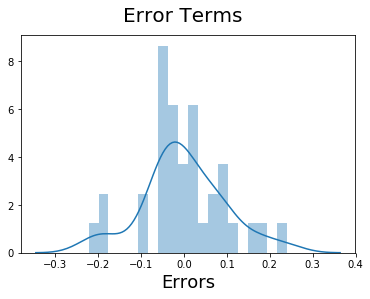

In [337]:
y_train_pred = lr_2.predict(X_train_lm)
# Residula Analysis of error terms
fig = plt.figure()
sns.distplot((y_train_log - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

#### GMV_SUM = 0.6581 + 0.2226 * units_sum + 0.2742 * product_procurement_sla_mean - 0.0072 * Weekly_Investment_Digital_mean - 0.1403 * Weekly_Investment_affiliates_mean + 0.1123 * Weekly_Investment_SEM_mean + 0.0669 * Weekly_Investment_Other_mean - 0.1239 * Monthly_NPS_mean

### Koyck Model

#### Camera Accessory

In [341]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_camera, train_size = 0.7, test_size = 0.3, random_state = 100)

In [342]:
df_train.describe()

,gmv_sum,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,...,Weekly_Digital_adstock_mean,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.212309,0.419679,0.461673,0.766378,0.379661,0.542315,0.466277,0.441179,0.206111,0.434105,...,0.246143,0.522532,0.711009,0.338328,0.707665,0.222222,0.861111,0.111111,0.674653,0.625000
std,0.217129,0.190521,0.131835,0.129343,0.173661,0.062448,0.265334,0.264522,0.289178,0.303928,...,0.314751,0.260259,0.308842,0.297792,0.311436,0.421637,0.350736,0.318728,0.215047,0.226180
min,0.000000,0.045708,0.000000,0.472796,0.048129,0.437365,0.000000,0.024114,0.000000,0.037137,...,0.000000,0.023464,0.012599,0.000000,0.015028,0.000000,0.000000,0.000000,0.237500,0.208333
25%,0.000000,0.322697,0.384522,0.671725,0.302617,0.493050,0.300979,0.178744,0.038780,0.156620,...,0.026718,0.441009,0.661908,0.149200,0.655408,0.000000,1.000000,0.000000,0.525000,0.437500
50%,0.268173,0.373985,0.470127,0.777478,0.340817,0.549875,0.458873,0.460105,0.081481,0.365985,...,0.101145,0.486581,0.831922,0.214254,0.858767,0.000000,1.000000,0.000000,0.687500,0.618056
75%,0.334315,0.503499,0.538321,0.843706,0.446810,0.589253,0.597792,0.579710,0.181481,0.665231,...,0.419847,0.649909,0.937117,0.570667,0.941862,0.000000,1.000000,0.000000,0.856250,0.861111
max,1.000000,1.000000,0.704151,0.987421,1.000000,0.666400,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.987500,1.000000


In [343]:
# Adding the lag variables
df_train['gmv_sum_Lag'] = df_train['gmv_sum'].shift(1)
df_test['gmv_sum_Lag'] =  df_test['gmv_sum'].shift(1)

In [344]:
df_train['gmv_sum_Lag'].fillna(0, inplace=True)
df_test['gmv_sum_Lag'].fillna(0, inplace=True)

In [345]:
df_train.head()

,gmv_sum,units_sum,sla_mean,product_mrp_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Total_mean,Weekly_Investment_TV_mean,Weekly_Investment_Digital_mean,Weekly_Investment_Sponsorship_mean,...,Weekly_Sponsorship_adstock_mean,Weekly_Online_Marketing_adstock_mean,Weekly_SEM_adstock_mean,Weekly_affiliates_adstock_mean,Sale_Flag,Rain_Flag,Snow_Flag,Max Temp (°C)_max,Min Temp (°C)_min,gmv_sum_Lag
40,0.000000,0.405403,0.340478,0.625629,0.328567,0.467611,0.334039,0.560386,0.033333,0.277718,...,0.441009,0.833777,0.158839,0.886498,0.0,0,0,0.7500,0.444444,0.000000
44,0.000000,0.553587,0.323228,0.689173,0.475881,0.459459,0.458873,0.144928,0.025926,0.365985,...,0.480929,0.966042,0.220112,0.942125,0.0,1,0,0.7625,0.569444,0.000000
37,0.249263,0.474210,0.306081,0.472796,0.326697,0.467071,0.587940,1.000000,0.137037,0.484392,...,0.492233,0.906270,0.208396,0.941862,0.0,1,0,0.6375,0.402778,0.000000
17,0.486138,0.495547,0.440842,0.774899,0.458924,0.618161,0.300979,0.454106,0.066667,0.156620,...,0.604783,0.830067,0.586696,0.831037,1.0,1,0,0.7000,0.458333,0.249263
7,0.049895,0.045708,0.517279,0.943831,0.048129,0.597676,0.552882,0.405502,0.073897,0.720207,...,0.524097,0.368420,0.115248,0.357463,1.0,0,0,0.9250,0.986111,0.486138


In [346]:
# Working out the first iteration
y_train=df_train.pop('gmv_sum')

In [348]:
X = df_train
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     49.20
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.65e-07
Time:                        16:31:02   Log-Likelihood:                 91.172
No. Observations:                  36   AIC:                            -130.3
Df Residuals:                      10   BIC:                            -89.17
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [370]:
VIF(X)

,Features,VIF
0,units_sum,5.104
4,s1_fact.order_payment_type_sum,4.394
1,product_procurement_sla_mean,2.916
3,NPS_mean,1.204
5,Weekly_TV_adstock_mean,0.964
6,Weekly_Digital_adstock_mean,0.808
2,Weekly_Investment_Radio_mean,0.390
7,Sale_Flag,0.288


In [350]:
# Dropping variables after each iteration
# 1st iteration
X.drop('Weekly_SEM_adstock_mean',axis=1,inplace=True)

In [352]:
# 2nd iteration
X.drop('Weekly_Investment_Total_mean',axis=1,inplace=True)

In [354]:
# 2nd iteration
X.drop('Weekly_Investment_Other_mean',axis=1,inplace=True)

In [356]:
X = X.drop('product_mrp_sum', 1,)
X = X.drop('Snow_Flag', 1,)
X = X.drop('sla_mean', 1,) 
X = X.drop('product_mrp_mean', 1,)
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('Weekly_Investment_Online_Marketing_mean', 

X = X.drop('Weekly_Investment_TV_mean', 1,)

X = X.drop('Min Temp (°C)_min', 1,)


X = X.drop('gmv_sum_Lag', 1,)
X = X.drop('Max Temp (°C)_max', 1,) 
X = X.drop('Rain_Flag', 1,) 
X = X.drop('Weekly_Investment_Digital_mean', 1,)
X = X.drop('Pay_Day_Flag', 1,) 
X = X.drop('Weekly_Investment_affiliates_mean', 1,)


In [365]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6.024
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000181
Time:                        16:59:03   Log-Likelihood:                 22.843
No. Observations:                  36   AIC:                            -27.69
Df Residuals:                      27   BIC:                            -13.43
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [359]:
X.drop(['Weekly_affiliates_adstock_mean'],axis=1,inplace=True)

In [361]:
X.drop(['Weekly_Investment_SEM_mean','Weekly_Investment_Content_Marketing_mean'],axis=1,inplace=True)

In [364]:
X.drop(['Weekly_Sponsorship_adstock_mean','Weekly_Online_Marketing_adstock_mean'],axis=1,inplace=True)

In [371]:
# Residual Analysis
y_train_pred = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

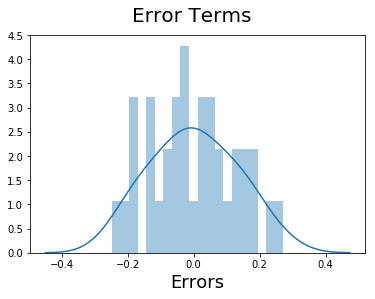

In [372]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [375]:
y_test=df_test.pop('gmv_sum')

X_test = df_test[X.columns]
X_test_lm = sm.add_constant(X_test)

y_pred=lr_2.predict(X_test_lm)

#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [377]:
print("RMSE: ", rmse)

RMSE:  0.3528109291026809


In [379]:
lr_2.params

const                            -1.124657
units_sum                         0.312492
product_procurement_sla_mean      1.788437
Weekly_Investment_Radio_mean      0.329644
NPS_mean                          0.455491
s1_fact.order_payment_type_sum    0.113259
Weekly_TV_adstock_mean           -0.138263
Weekly_Digital_adstock_mean       0.362018
Sale_Flag                         0.019966
dtype: float64


**gmv_sum= -1.124 + 0.312*units_sum + 1.78* product_procurement_sla + 0.32* Weekly_Investment_Radio_mean-0.13*Weekly_TV_adstock_mean 
        +0.0199*Sale_Flag**

#### Gaming Accessory

In [417]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df_train, df_test = train_test_split(master_gaming, train_size = 0.7, test_size = 0.3, random_state = 100)

# Adding the lag variables
df_train['gmv_sum_Lag'] = df_train['gmv_sum'].shift(1)
df_test['gmv_sum_Lag'] =  df_test['gmv_sum'].shift(1)

df_train['gmv_sum_Lag'].fillna(0, inplace=True)
df_test['gmv_sum_Lag'].fillna(0, inplace=True)

In [422]:
# Working out the first iteration
y_train=df_train.pop('gmv_sum')

X_train = df_train
X=X_train

In [423]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     60.60
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.44e-09
Time:                        18:25:24   Log-Likelihood:                 92.934
No. Observations:                  37   AIC:                            -135.9
Df Residuals:                      12   BIC:                            -95.59
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [424]:
VIF(X)

,Features,VIF
7,Weekly_Investment_Digital_mean,1450898.754
18,Weekly_TV_adstock_mean,182822.532
9,Weekly_Investment_Content_Marketing_mean,96385.058
23,Weekly_affiliates_adstock_mean,76335.136
14,Weekly_Investment_Other_mean,43773.212
13,Weekly_Investment_Radio_mean,41916.582
12,Weekly_Investment_SEM_mean,29154.206
15,NPS_mean,22029.804
10,Weekly_Investment_Online_Marketing_mean,21429.638
6,Weekly_Investment_TV_mean,16640.054


In [425]:
# Dropping highly correlated variables and insignificant variables

#Iteration 1

X = X_train.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('Weekly_Investment_Content_Marketing_mean', 1,)
X = X.drop('product_mrp_sum', 1,)
X = X.drop('Pay_Day_Flag', 1,)
X = X.drop('sla_mean', 1,)
X = X.drop('Snow_Flag', 1,)
X = X.drop('Weekly_Investment_Radio_mean', 1,)
X = X.drop('Min Temp (°C)_min', 1,) 
X = X.drop('gmv_sum_Lag', 1,) 

X = X.drop('Rain_Flag', 1,) 
X = X.drop('Max Temp (°C)_max', 1,) 
X = X.drop('Weekly_Investment_Digital_mean', 1,)
X = X.drop('Weekly_Investment_Total_mean', 1,)
X = X.drop('product_mrp_mean', 1,)
X = X.drop('Weekly_Investment_affiliates_mean', 1,) 
X = X.drop('Weekly_Investment_TV_mean', 1,)

In [389]:
VIF(X)

,Features,VIF
0,units_sum,72.638
2,product_mrp_sum,55.802
9,s1_fact.order_payment_type_sum,35.628
5,Weekly_Investment_Content_Marketing_mean,10.980
7,Weekly_Investment_SEM_mean,8.638
1,sla_mean,3.722
6,Weekly_Investment_Online_Marketing_mean,3.224
12,Min Temp (°C)_min,1.916
4,Weekly_Investment_Sponsorship_mean,1.914
3,product_procurement_sla_mean,1.548


In [386]:
X.drop(['Weekly_Investment_Radio_mean',
'Weekly_SEM_adstock_mean',
'Weekly_Sponsorship_adstock_mean',
'Weekly_Digital_adstock_mean'], axis=1, inplace=True)

In [388]:
X.drop(['Weekly_TV_adstock_mean', 
'Weekly_affiliates_adstock_mean',
'NPS_mean',
'Weekly_Investment_Other_mean',
'Weekly_Online_Marketing_adstock_mean'], axis=1,inplace=True)

In [398]:
#X.drop([], axis=1,inplace=True)

In [393]:
X.head()

,units_sum,sla_mean,product_mrp_sum,product_procurement_sla_mean,Weekly_Investment_Sponsorship_mean,Weekly_Investment_Content_Marketing_mean,Weekly_Investment_Online_Marketing_mean,Weekly_Investment_SEM_mean,Pay_Day_Flag,s1_fact.order_payment_type_sum,Sale_Flag,Snow_Flag,Min Temp (°C)_min
25,0.241281,0.583410,0.191463,0.587820,2.789435e-15,0.259740,0.935676,0.015974,1.0,0.278063,0.0,0,0.208333
26,0.327824,0.601590,0.279490,0.493273,1.089406e-15,0.259740,0.935676,0.015974,0.0,0.356947,1.0,0,0.250000
35,0.216944,0.573706,0.141751,0.378157,4.645053e-01,0.103896,0.742704,0.051118,0.0,0.204997,0.0,0,0.402778
17,0.215643,0.678676,0.166847,0.460754,1.240917e-01,0.051948,0.791434,0.052716,0.0,0.248631,0.0,1,0.388889
7,0.237897,0.562020,0.174570,0.826773,7.277809e-01,0.181818,0.653040,0.087859,1.0,0.265058,0.0,0,0.750000


In [426]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     19.68
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.93e-09
Time:                        18:27:03   Log-Likelihood:                 52.215
No. Observations:                  37   AIC:                            -74.43
Df Residuals:                      22   BIC:                            -50.27
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [433]:
VIF(X)

,Features,VIF
0,units_sum,9.862
1,product_procurement_sla_mean,8.460
2,Weekly_Investment_Online_Marketing_mean,7.630
6,s1_fact.order_payment_type_sum,7.620
3,Weekly_Investment_SEM_mean,3.972
8,Weekly_Digital_adstock_mean,3.876
7,Weekly_TV_adstock_mean,3.158
5,NPS_mean,2.454
4,Weekly_Investment_Other_mean,0.460
9,Sale_Flag,0.332


In [428]:
X.drop(['Weekly_Online_Marketing_adstock_mean','Weekly_affiliates_adstock_mean','Weekly_SEM_adstock_mean'],axis=1,inplace=True)

In [431]:
X.drop(['Weekly_Sponsorship_adstock_mean'],axis=1,inplace=True)

In [432]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     11.93
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.21e-07
Time:                        18:30:11   Log-Likelihood:                 35.868
No. Observations:                  37   AIC:                            -49.74
Df Residuals:                      26   BIC:                            -32.02
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [435]:
X.drop('Sale_Flag',axis=1,inplace=True)

In [436]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     13.77
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.69e-08
Time:                        18:31:14   Log-Likelihood:                 35.868
No. Observations:                  37   AIC:                            -51.74
Df Residuals:                      27   BIC:                            -35.63
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [437]:
X.drop('Weekly_Investment_Online_Marketing_mean',axis=1,inplace=True)

In [438]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     16.06
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.35e-08
Time:                        18:32:07   Log-Likelihood:                 35.867
No. Observations:                  37   AIC:                            -53.73
Df Residuals:                      28   BIC:                            -39.24
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Text(0.5,0,'Errors')

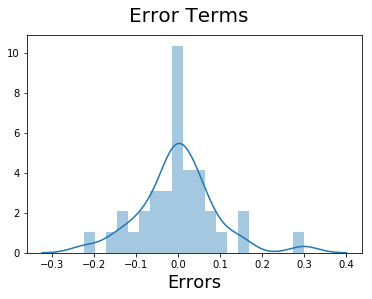

In [439]:
# Residual Analysis
y_train_pred = lr_2.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

In [440]:
y_test=df_test.pop('gmv_sum')

X_test = df_test[X.columns]
X_test_lm = sm.add_constant(X_test)

y_pred=lr_2.predict(X_test_lm)

#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [441]:
print("RMSE :", rmse)

RMSE : 0.10894997140299705


**gmv_sum=0.0064 + 1.3*units_sum + 0.375*product_procurement_sla_mean - 0.66 * Weekly_Investment_SEM_mean +0.9* Weekly_Digital_adstock_mean -0.07*NPS_mean-0.7*TV_adstock_mean**

#### Home Audio

In [449]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df_train, df_test = train_test_split(master_home, train_size = 0.7, test_size = 0.3, random_state = 100)

# Adding the lag variables
df_train['gmv_sum_Lag'] = df_train['gmv_sum'].shift(1)
df_test['gmv_sum_Lag'] =  df_test['gmv_sum'].shift(1)

df_train['gmv_sum_Lag'].fillna(0, inplace=True)
df_test['gmv_sum_Lag'].fillna(0, inplace=True)

In [450]:
# Working out the first iteration
y_train=df_train.pop('gmv_sum')

X_train = df_train
X=X_train

In [451]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     531.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.28e-12
Time:                        18:57:25   Log-Likelihood:                 133.84
No. Observations:                  35   AIC:                            -217.7
Df Residuals:                      10   BIC:                            -178.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [452]:
VIF(X)

,Features,VIF
14,Weekly_Investment_Other_mean,731889.092
12,Weekly_Investment_SEM_mean,120271.170
13,Weekly_Investment_Radio_mean,75202.270
19,Weekly_Digital_adstock_mean,58081.676
20,Weekly_Sponsorship_adstock_mean,29774.314
22,Weekly_SEM_adstock_mean,18692.564
9,Weekly_Investment_Content_Marketing_mean,15176.164
18,Weekly_TV_adstock_mean,13291.756
23,Weekly_affiliates_adstock_mean,12393.808
11,Weekly_Investment_affiliates_mean,7906.656


In [453]:
# Dropping highly correlated variables and insignificant variables


X = X_train.drop('Weekly_Investment_Total_mean', 1,) 


X = X.drop('product_mrp_sum', 1,)
X = X.drop('Weekly_Investment_affiliates_mean', 1,)
X = X.drop('NPS_mean', 1,)
X = X.drop('Weekly_Investment_SEM_mean', 1,)
X = X.drop('Snow_Flag', 1,) 
X = X.drop('gmv_sum_Lag', 1,) 

X = X.drop('sla_mean', 1,)
X = X.drop('Max Temp (°C)_max', 1,) 
X = X.drop('product_mrp_mean', 1,)
X = X.drop('Rain_Flag', 1,) 
X = X.drop('Weekly_Investment_Other_mean', 1,)
X = X.drop('Pay_Day_Flag', 1,)
X = X.drop('Weekly_Investment_Digital_mean', 1,) 
X = X.drop('Weekly_Investment_Online_Marketing_mean', 1,)
X = X.drop('Weekly_Investment_Sponsorship_mean', 1,)
X = X.drop('product_procurement_sla_mean', 1,)

In [460]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     13.68
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.50e-07
Time:                        19:00:49   Log-Likelihood:                 37.562
No. Observations:                  35   AIC:                            -57.12
Df Residuals:                      26   BIC:                            -43.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [459]:
VIF(X)

,Features,VIF
4,s1_fact.order_payment_type_sum,22.704
0,units_sum,20.286
1,Weekly_Investment_TV_mean,2.018
5,Weekly_TV_adstock_mean,1.794
2,Weekly_Investment_Content_Marketing_mean,0.686
7,Min Temp (°C)_min,0.534
6,Sale_Flag,0.406
3,Weekly_Investment_Radio_mean,0.372


In [456]:
X.drop(['Weekly_Online_Marketing_adstock_mean','Weekly_affiliates_adstock_mean'],axis=1,inplace=True)

In [458]:
X.drop(['Weekly_SEM_adstock_mean','Weekly_Digital_adstock_mean','Weekly_Sponsorship_adstock_mean'],axis=1,inplace=True)

In [461]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     13.68
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.50e-07
Time:                        19:01:53   Log-Likelihood:                 37.562
No. Observations:                  35   AIC:                            -57.12
Df Residuals:                      26   BIC:                            -43.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Text(0.5,0,'Errors')

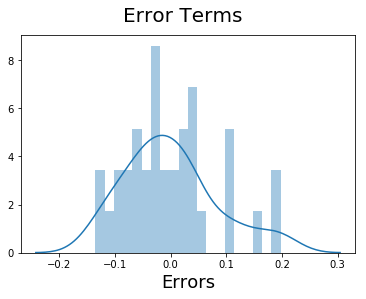

In [462]:
# Residual Analysis
y_train_pred = lr_2.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [463]:
y_test=df_test.pop('gmv_sum')

X_test = df_test[X.columns]
X_test_lm = sm.add_constant(X_test)

y_pred=lr_2.predict(X_test_lm)

#Calculating RMSE and R-Squared score
rmse, r2score = rmse_r2score(y_test, y_pred)

In [464]:
print("RMSE :",rmse)

RMSE : 0.11001145046070704


**-0.152284+ units_sum*0.453299 + Weekly_Investment_TV_mean*0.156535 + Weekly_Investment_Content_Marketing_mean*0.043115 + Weekly_Investment_Radio_mean*-0.062914
+s1_fact.order_payment_type_sum *0.384173 + Weekly_TV_adstock_mean*-0.261347 + Sale_Flag*0.041094 + Min Temp (°C)_min*0.151293**